In [100]:
import numpy as np

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras import optimizers
from keras.utils import np_utils
from keras.datasets import mnist
from keras.callbacks import EarlyStopping

In [52]:
import matplotlib.pyplot as plt

from keras.layers.normalization import BatchNormalization

Build a DNN with five hidden layers of 100 neurons each, He initialization, and the ELU
activation function.
2. Using Adam optimization and early stopping, try training it on MNIST but only on digits 0
to 4, as we will use transfer learning for digits 5 to 9 in the next exercise. You will need a
softmax output layer with five neurons.
3. Tune the hyperparameters using cross-validation and see what precision you can
achieve.
4. Now try adding Batch Normalization and compare the learning curves: is it converging
faster than before? Does it produce a better model?
5. Is the model overfitting the training set? Try adding dropout to every layer and try
again. Does it help?

In [3]:
np.random.seed(123) 


In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()



In [5]:
digits_04 = [0, 1, 2, 3, 4]
digits_59 = [5, 6, 7, 8, 9]

In [6]:
X_train = X_train.reshape((-1, 784))
X_test = X_test.reshape((-1, 784))

In [7]:
x_train04, y_train04 = X_train[y_train <= 4], y_train[y_train <= 4]

In [8]:
x_train59, y_train59 = X_train[y_train > 4], y_train[y_train > 4]

In [9]:
x_test04, y_test04 = X_test[y_test <= 4], y_test[y_test <= 4]

In [10]:
x_test59, y_test59 = X_test[y_test > 4], y_test[y_test > 4]

In [11]:
y_train59=y_train59-5

In [12]:
y_test59=y_test59-5

In [13]:
num_classes = 5

y_train04 = np_utils.to_categorical(y_train04, num_classes)
y_test04 = np_utils.to_categorical(y_test04, num_classes)


y_train59 = np_utils.to_categorical(y_train59, num_classes)
y_test59 = np_utils.to_categorical(y_test59, num_classes)

In [32]:
def getmodel():
    model = Sequential()
    model.add(Dense(100, activation='elu', input_shape=(784,), kernel_initializer='he_normal'))
    model.add(Dense(100, activation='elu', kernel_initializer='he_normal'))
    model.add(Dense(100, activation='elu', kernel_initializer='he_normal'))
    model.add(Dense(100, activation='elu', kernel_initializer='he_normal'))
    model.add(Dense(100, activation='elu', kernel_initializer='he_normal'))
    model.add(Dense(5, activation='softmax', kernel_initializer='he_normal'))
    return model

In [33]:
model = getmodel()

In [26]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [139]:
es = EarlyStopping(monitor='val_acc', patience=3, verbose=1)
es_acc = EarlyStopping(monitor='acc', patience=3, verbose=1)

Try to fit with different hyperparameters:

In [30]:
history1 = model.fit(x_train04, y_train04, validation_data=(x_test04, y_test04), epochs=100, batch_size=128, callbacks=[es])

Train on 30596 samples, validate on 5139 samples
Epoch 1/100
30596/30596 [==============================] - 3s 86us/step - loss: 0.8626 - acc: 0.9462 - val_loss: 0.7529 - val_acc: 0.9529
Epoch 2/100
30596/30596 [==============================] - 3s 85us/step - loss: 0.7131 - acc: 0.9555 - val_loss: 0.9498 - val_acc: 0.9408
Epoch 3/100
30596/30596 [==============================] - 3s 88us/step - loss: 0.9380 - acc: 0.9415 - val_loss: 0.5363 - val_acc: 0.9667
Epoch 4/100
30596/30596 [==============================] - 2s 81us/step - loss: 0.6973 - acc: 0.9567 - val_loss: 0.4894 - val_acc: 0.9694
Epoch 5/100
30596/30596 [==============================] - 3s 87us/step - loss: 0.8098 - acc: 0.9497 - val_loss: 0.9267 - val_acc: 0.9424
Epoch 6/100
30596/30596 [==============================] - 3s 84us/step - loss: 0.7984 - acc: 0.9504 - val_loss: 0.5603 - val_acc: 0.9650
Epoch 7/100
30596/30596 [==============================] - 2s 75us/step - loss: 0.9456 - acc: 0.9412 - val_loss: 0.8232 - v

In [31]:
history2 = model.fit(x_train04, y_train04, validation_data=(x_test04, y_test04), epochs=100, batch_size=64, callbacks=[es])

Train on 30596 samples, validate on 5139 samples
Epoch 1/100
30596/30596 [==============================] - 4s 123us/step - loss: 0.8097 - acc: 0.9497 - val_loss: 0.5740 - val_acc: 0.9644
Epoch 2/100
30596/30596 [==============================] - 4s 123us/step - loss: 1.1455 - acc: 0.9288 - val_loss: 1.0570 - val_acc: 0.9344
Epoch 3/100
30596/30596 [==============================] - 4s 129us/step - loss: 1.1776 - acc: 0.9269 - val_loss: 0.8437 - val_acc: 0.9477
Epoch 4/100
30596/30596 [==============================] - 4s 120us/step - loss: 1.1114 - acc: 0.9310 - val_loss: 1.4826 - val_acc: 0.9080
Epoch 00004: early stopping


In [39]:
model=getmodel()

In [40]:
adam = optimizers.Adam(lr=0.0005)
model.compile(optimizer=adam,loss='categorical_crossentropy', metrics=['accuracy'])

In [131]:
def compile(model):
    adam = optimizers.Adam(lr=0.0005)
    model.compile(optimizer=adam,loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
history1 = model.fit(x_train04, y_train04, validation_data=(x_test04, y_test04), epochs=100, batch_size=128, callbacks=[es])

Train on 30596 samples, validate on 5139 samples
Epoch 1/100
30596/30596 [==============================] - 3s 94us/step - loss: 1.2907 - acc: 0.9027 - val_loss: 0.3608 - val_acc: 0.9712
Epoch 2/100
30596/30596 [==============================] - 2s 76us/step - loss: 0.3930 - acc: 0.9688 - val_loss: 0.2069 - val_acc: 0.9813
Epoch 3/100
30596/30596 [==============================] - 2s 73us/step - loss: 0.3077 - acc: 0.9748 - val_loss: 0.2094 - val_acc: 0.9821
Epoch 4/100
30596/30596 [==============================] - 2s 73us/step - loss: 0.2752 - acc: 0.9768 - val_loss: 0.2252 - val_acc: 0.9805
Epoch 5/100
30596/30596 [==============================] - 3s 83us/step - loss: 0.2135 - acc: 0.9822 - val_loss: 0.1521 - val_acc: 0.9864
Epoch 6/100
30596/30596 [==============================] - 2s 77us/step - loss: 0.1835 - acc: 0.9845 - val_loss: 0.1665 - val_acc: 0.9850
Epoch 7/100
30596/30596 [==============================] - 2s 72us/step - loss: 0.1709 - acc: 0.9850 - val_loss: 0.2395 - v

So, best hyperparamethers was learning rate=0.0005 and batch size = 128

In [45]:
history1.history

{'acc': [0.90269969930709892,
  0.96881945352333643,
  0.97483331154399266,
  0.97682703621388411,
  0.98221989802588572,
  0.98454046280559548,
  0.98499803895934113,
  0.98512877500326845],
 'loss': [1.2906717645662613,
  0.39303222275845123,
  0.30770651007352978,
  0.27515301063553288,
  0.21354194655137751,
  0.18347066356305761,
  0.170891590480726,
  0.17424721449429889],
 'val_acc': [0.97120062268923912,
  0.98131932282545242,
  0.98209768445558132,
  0.98054096127651291,
  0.98637867289355907,
  0.98501654026410435,
  0.9791788285658688,
  0.98384899785950575],
 'val_loss': [0.36076334211739741,
  0.20685878521049217,
  0.20936511801630736,
  0.22520951865204505,
  0.1521438134657806,
  0.16645488318795079,
  0.23952475484828253,
  0.18982530398246916]}

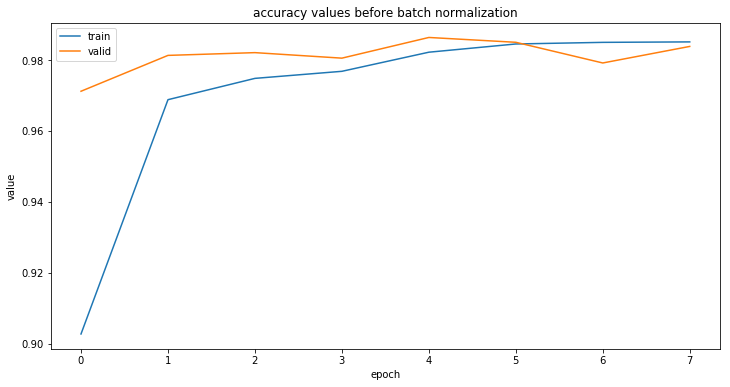

In [55]:
def draw_plot(h,title):
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(h.history['acc'])
    ax.plot(h.history['val_acc'])
    ax.legend(['train', 'valid'])
    ax.set_title(title)
    ax.set_xlabel('epoch')
    ax.set_ylabel('value')
    plt.show()
    
draw_plot(history1, 'accuracy values before batch normalization')

In [62]:
def get_new_model(dropout=False):
    model = Sequential()
    model.add(Dense(100, input_shape=(784,), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    
    if dropout:
        model.add(Dropout(0.1))
    
    model.add(Dense(100, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    
    if dropout:
        model.add(Dropout(0.1))
    
    model.add(Dense(100, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    
    if dropout:
        model.add(Dropout(0.1))
    
    model.add(Dense(100, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    
    if dropout:
        model.add(Dropout(0.1))
    
    model.add(Dense(100, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    
    if dropout:
        model.add(Dropout(0.1))
    
    model.add(Dense(5, activation='softmax', kernel_initializer='he_normal'))
    return model

In [54]:
m = get_new_model()

In [57]:
adam = optimizers.Adam(lr=0.0005)
m.compile(optimizer=adam,loss='categorical_crossentropy', metrics=['accuracy'])

In [58]:
hh = m.fit(x_train04, y_train04, validation_data=(x_test04, y_test04), epochs=100, batch_size=128, callbacks=[es])

Train on 30596 samples, validate on 5139 samples
Epoch 1/100
30596/30596 [==============================] - 7s 241us/step - loss: 0.1556 - acc: 0.9530 - val_loss: 0.0621 - val_acc: 0.9819
Epoch 2/100
30596/30596 [==============================] - 5s 167us/step - loss: 0.0548 - acc: 0.9839 - val_loss: 0.0374 - val_acc: 0.9887
Epoch 3/100
30596/30596 [==============================] - 5s 166us/step - loss: 0.0349 - acc: 0.9895 - val_loss: 0.0292 - val_acc: 0.9910
Epoch 4/100
30596/30596 [==============================] - 5s 175us/step - loss: 0.0241 - acc: 0.9930 - val_loss: 0.0290 - val_acc: 0.9903
Epoch 5/100
30596/30596 [==============================] - 6s 182us/step - loss: 0.0201 - acc: 0.9942 - val_loss: 0.0271 - val_acc: 0.9905
Epoch 6/100
30596/30596 [==============================] - 6s 191us/step - loss: 0.0207 - acc: 0.9933 - val_loss: 0.0237 - val_acc: 0.9922
Epoch 7/100
30596/30596 [==============================] - 6s 188us/step - loss: 0.0137 - acc: 0.9958 - val_loss: 0.0

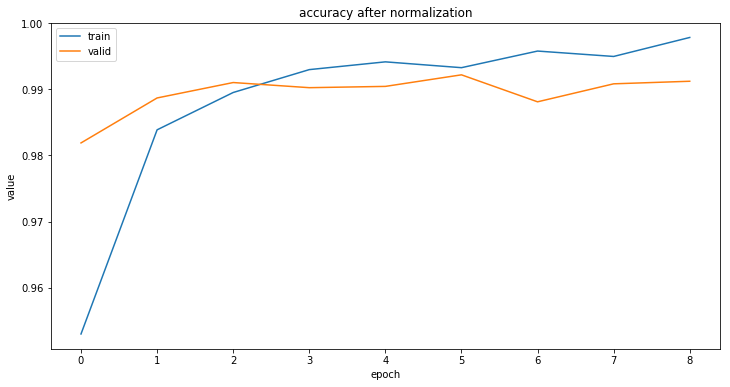

In [59]:
draw_plot(hh, 'accuracy after normalization')

In [112]:
mdrop = get_new_model(True)
mdrop.compile(optimizer=adam,loss='categorical_crossentropy', metrics=['accuracy'])

In [113]:
hdrop = mdrop.fit(x_train04, y_train04, validation_data=(x_test04, y_test04), epochs=100, batch_size=128, callbacks=[es])

Train on 30596 samples, validate on 5139 samples
Epoch 1/100
30596/30596 [==============================] - 8s 261us/step - loss: 0.1416 - acc: 0.9552 - val_loss: 0.0526 - val_acc: 0.9850
Epoch 2/100
30596/30596 [==============================] - 6s 184us/step - loss: 0.0702 - acc: 0.9783 - val_loss: 0.0478 - val_acc: 0.9848
Epoch 3/100
30596/30596 [==============================] - 6s 199us/step - loss: 0.0620 - acc: 0.9811 - val_loss: 0.0404 - val_acc: 0.9856
Epoch 4/100
30596/30596 [==============================] - 6s 209us/step - loss: 0.0534 - acc: 0.9836 - val_loss: 0.0328 - val_acc: 0.9893
Epoch 5/100
30596/30596 [==============================] - 6s 196us/step - loss: 0.0499 - acc: 0.9842 - val_loss: 0.0298 - val_acc: 0.9893
Epoch 6/100
30596/30596 [==============================] - 5s 173us/step - loss: 0.0405 - acc: 0.9880 - val_loss: 0.0259 - val_acc: 0.9912
Epoch 7/100
30596/30596 [==============================] - 6s 197us/step - loss: 0.0360 - acc: 0.9886 - val_loss: 0.0

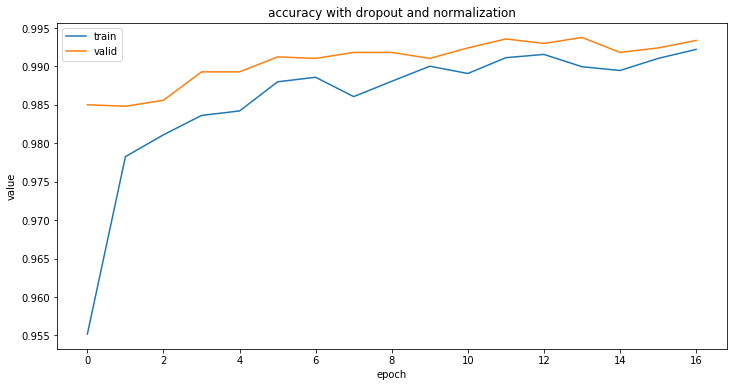

In [114]:
draw_plot(hdrop, 'accuracy with dropout and normalization')

Model does not overfit on training set. And adding dropout layers improves accuracy a little bit 

In [115]:
best_model = mdrop
best_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 100)               78500     
_________________________________________________________________
batch_normalization_11 (Batc (None, 100)               400       
_________________________________________________________________
activation_11 (Activation)   (None, 100)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 100)               10100     
_________________________________________________________________
batch_normalization_12 (Batc (None, 100)               400       
_________________________________________________________________
activation_12 (Activation)   (None, 100)               0         
__________

In [116]:
for layer in best_model.layers[:-1]: # all except softmax
    layer.trainable = False


In [117]:
def replace_intermediate_layer_in_keras(layers, new_layers):
    x = layers[0].output
    for layer in layers[1:]:
        x = layer(x)
    for layer in new_layers:
        x = layer(x)

    new_model = Model(input=layers[0].input, output=x)
    return new_model

In [152]:
model2 = best_model.model

model22 = replace_intermediate_layer_in_keras(model2.layers[:-1], [Dense(5, activation='softmax', kernel_initializer='he_normal')])

/Users/alikhil/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("de..., outputs=Tensor("de...)`


In [153]:
compile(model22)

In [155]:
hm2 = model22.fit(x_train59[0:500], y_train59[0:500], validation_data=(x_test59, y_test59), epochs=200, batch_size=128, callbacks=[es])

Train on 500 samples, validate on 4861 samples
Epoch 1/200
500/500 [==============================] - 0s 639us/step - loss: 0.8182 - acc: 0.7300 - val_loss: 0.8155 - val_acc: 0.7256
Epoch 2/200
500/500 [==============================] - 0s 524us/step - loss: 0.8258 - acc: 0.7300 - val_loss: 0.8134 - val_acc: 0.7256
Epoch 3/200
500/500 [==============================] - 0s 528us/step - loss: 0.8370 - acc: 0.7040 - val_loss: 0.8114 - val_acc: 0.7258
Epoch 4/200
500/500 [==============================] - 0s 502us/step - loss: 0.8249 - acc: 0.7440 - val_loss: 0.8092 - val_acc: 0.7276
Epoch 5/200
500/500 [==============================] - 0s 874us/step - loss: 0.8260 - acc: 0.7080 - val_loss: 0.8067 - val_acc: 0.7285
Epoch 6/200
500/500 [==============================] - 1s 1ms/step - loss: 0.8259 - acc: 0.7200 - val_loss: 0.8042 - val_acc: 0.7299
Epoch 7/200
500/500 [==============================] - 0s 564us/step - loss: 0.7975 - acc: 0.7380 - val_loss: 0.8020 - val_acc: 0.7311
Epoch 8/20

In [156]:
cmod = replace_intermediate_layer_in_keras(model2.layers[:-1], [])

/Users/alikhil/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("de..., outputs=Tensor("dr...)`


In [157]:
compile(cmod)

In [158]:
y_pred = cmod.predict(x_train59)

In [159]:
fmod = Sequential()
fmod.add(Dense(5, activation='softmax',kernel_initializer='he_normal', input_shape=(100,)))

In [160]:
compile(fmod)

In [161]:
fmod.fit(y_pred, y_train59, epochs=100, batch_size=128, callbacks=[es_acc])

Epoch 1/100
29404/29404 [==============================] - 2s 67us/step - loss: 1.2445 - acc: 0.5420
Epoch 2/100
29404/29404 [==============================] - 1s 28us/step - loss: 0.7935 - acc: 0.7353
Epoch 3/100
29404/29404 [==============================] - 1s 31us/step - loss: 0.6809 - acc: 0.7786
Epoch 4/100
29404/29404 [==============================] - 1s 33us/step - loss: 0.6175 - acc: 0.7978
Epoch 5/100
29404/29404 [==============================] - 1s 31us/step - loss: 0.5755 - acc: 0.8095
Epoch 6/100
29404/29404 [==============================] - 1s 30us/step - loss: 0.5449 - acc: 0.8202
Epoch 7/100
29404/29404 [==============================] - 1s 37us/step - loss: 0.5207 - acc: 0.8276
Epoch 8/100
29404/29404 [==============================] - 1s 29us/step - loss: 0.5010 - acc: 0.8337
Epoch 9/100
29404/29404 [==============================] - 1s 30us/step - loss: 0.4842 - acc: 0.8394
Epoch 10/100
29404/29404 [==============================] - 1s 27us/step - loss: 0.4699 - a

In [162]:

top4layers = replace_intermediate_layer_in_keras(model2.layers[:-5], [Dense(5, activation='softmax',kernel_initializer='he_normal', input_shape=(100,))])

/Users/alikhil/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("de..., outputs=Tensor("de...)`


In [163]:
compile(top4layers)

In [164]:
hm2 = top4layers.fit(x_train59[0:500], y_train59[0:500], validation_data=(x_test59, y_test59), epochs=100, batch_size=128, callbacks=[es])

Train on 500 samples, validate on 4861 samples
Epoch 1/100
500/500 [==============================] - 2s 3ms/step - loss: 2.0668 - acc: 0.1880 - val_loss: 2.0629 - val_acc: 0.1759
Epoch 2/100
500/500 [==============================] - 0s 480us/step - loss: 1.9743 - acc: 0.2420 - val_loss: 1.9915 - val_acc: 0.1930
Epoch 3/100
500/500 [==============================] - 0s 411us/step - loss: 1.9656 - acc: 0.2320 - val_loss: 1.9210 - val_acc: 0.2109
Epoch 4/100
500/500 [==============================] - 0s 453us/step - loss: 1.8739 - acc: 0.2380 - val_loss: 1.8533 - val_acc: 0.2333
Epoch 5/100
500/500 [==============================] - 0s 431us/step - loss: 1.8090 - acc: 0.2700 - val_loss: 1.7881 - val_acc: 0.2547
Epoch 6/100
500/500 [==============================] - 0s 459us/step - loss: 1.7654 - acc: 0.3100 - val_loss: 1.7268 - val_acc: 0.2796
Epoch 7/100
500/500 [==============================] - 0s 415us/step - loss: 1.6966 - acc: 0.3100 - val_loss: 1.6686 - val_acc: 0.3051
Epoch 8/10

vac_acc is better for 0.02 than in the case of 5 layers model

In [166]:
for layer in best_model.layers[:8]: # unfreeze 2 top layers
    layer.trainable = True


In [167]:
last_model = replace_intermediate_layer_in_keras(best_model.model.layers[:-1], [Dense(5, activation='softmax', kernel_initializer='he_normal')])

/Users/alikhil/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("de..., outputs=Tensor("de...)`


In [168]:
compile(last_model)

In [170]:
last_model.fit(x_train59[0:500], y_train59[0:500], validation_data=(x_test59, y_test59), epochs=100, batch_size=128, callbacks=[es])

Train on 500 samples, validate on 4861 samples
Epoch 1/100
500/500 [==============================] - 3s 5ms/step - loss: 1.8914 - acc: 0.2260 - val_loss: 1.4630 - val_acc: 0.3868
Epoch 2/100
500/500 [==============================] - 0s 598us/step - loss: 1.5946 - acc: 0.3280 - val_loss: 1.2621 - val_acc: 0.5057
Epoch 3/100
500/500 [==============================] - 0s 603us/step - loss: 1.3908 - acc: 0.4460 - val_loss: 1.1112 - val_acc: 0.5972
Epoch 4/100
500/500 [==============================] - 0s 758us/step - loss: 1.2517 - acc: 0.5100 - val_loss: 0.9936 - val_acc: 0.6639
Epoch 5/100
500/500 [==============================] - 0s 760us/step - loss: 1.0793 - acc: 0.6040 - val_loss: 0.8975 - val_acc: 0.7056
Epoch 6/100
500/500 [==============================] - 0s 756us/step - loss: 0.9536 - acc: 0.6800 - val_loss: 0.8166 - val_acc: 0.7359
Epoch 7/100
500/500 [==============================] - 1s 1ms/step - loss: 0.8601 - acc: 0.7380 - val_loss: 0.7507 - val_acc: 0.7577
Epoch 8/100


Yea, unfreezing top 2 layers increases accuracy up to 90%